In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'blotta' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=blotta:US:bquxjob_2097d0d8_1881b33988d)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2097d0d8_1881b33988d') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT ano, tempo_emprego, quantidade_horas_contratadas, valor_remuneracao_media_sm, cbo_2002, idade, tipo_vinculo FROM `basedosdados.br_me_rais.microdados_vinculos` WHERE cbo_2002 LIKE "2611%%"OR cbo_1994="15210"


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [2]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_2097d0d8_1881b33988d') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,cbo_2002,idade,tipo_vinculo
0,1985,6.2,<NA>,9.37,None,<NA>,1
1,1985,2.5,<NA>,3.59,None,<NA>,1
2,1985,21.8,<NA>,17.47,None,<NA>,1
3,1988,1.5,<NA>,0.00,None,<NA>,1
4,1988,0.9,<NA>,1.23,None,<NA>,1
...,...,...,...,...,...,...,...
1123725,2018,20.6,42,9.44,261140,46,10
1123726,2018,5.8,30,6.21,261140,35,10
1123727,2018,273.0,40,34.03,261140,56,30
1123728,2018,29.6,40,4.54,261140,29,10


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [3]:
#importar bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import csv
import pandas as pd

In [4]:
results.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1123730.0,1.123730e+06,1084197.0,1.123730e+06,1084197.0
mean,2010.987899,5.054622e+01,37.506201,6.048485e+00,35.200423
std,7.045662,7.367404e+01,7.693839,7.839038e+00,11.036996
min,1985.0,0.000000e+00,0.0,0.000000e+00,0.0
25%,2007.0,7.800000e+00,30.0,1.840000e+00,27.0
50%,2012.0,2.200000e+01,40.0,3.660000e+00,33.0
75%,2016.0,5.900000e+01,44.0,7.120000e+00,42.0
max,2021.0,5.999000e+02,60.0,1.499700e+02,100.0


In [4]:
results = results.drop(columns=['cbo_2002'])

#Plotagem dos boxplots

<Axes: >

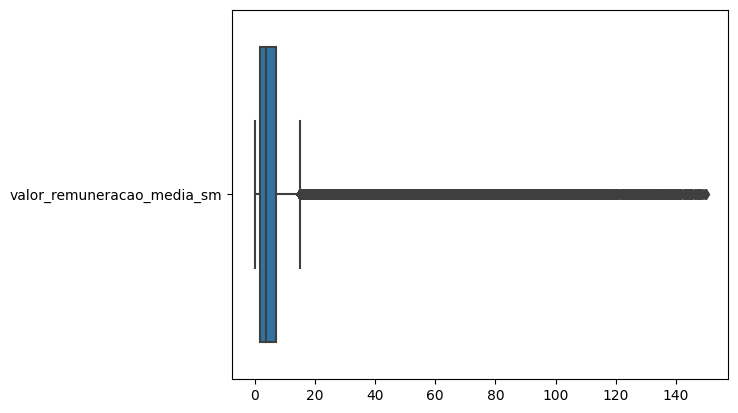

In [22]:
boxplot = results.drop(columns=['ano', 'tempo_emprego', 'idade', 'quantidade_horas_contratadas'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

In [5]:
#Limpeza 1

idadeusar = results.dropna(subset=['idade'])
horasusar = results.dropna(subset=['quantidade_horas_contratadas'])

<Axes: >

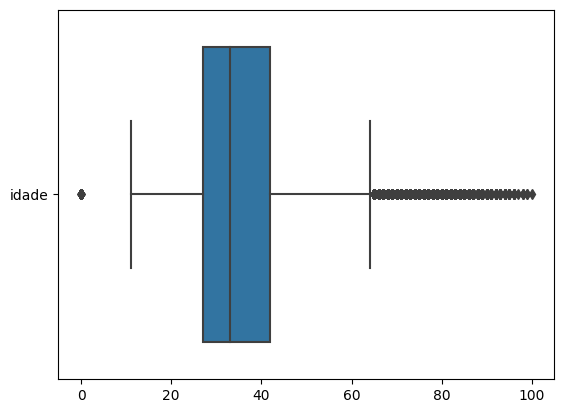

In [8]:
boxplot = idadeusar.drop(columns=['ano', 'tempo_emprego', 'valor_remuneracao_media_sm', 'quantidade_horas_contratadas'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

<Axes: >

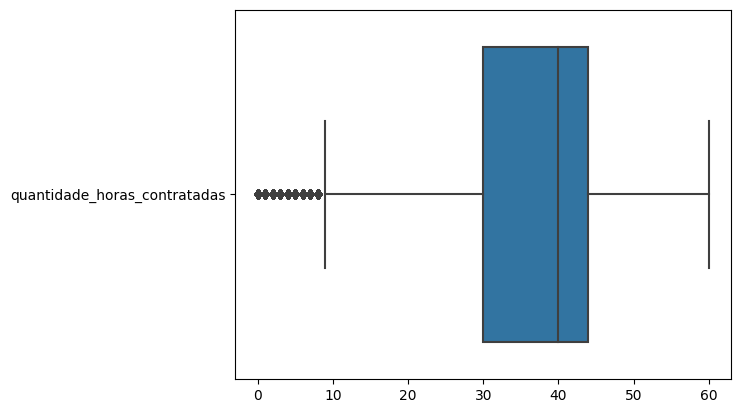

In [9]:
boxplot = horasusar.drop(columns=['ano', 'tempo_emprego', 'valor_remuneracao_media_sm', 'idade'])
sns.boxplot(data=boxplot, orient='h', saturation=0.75, width=0.8)

<Axes: >

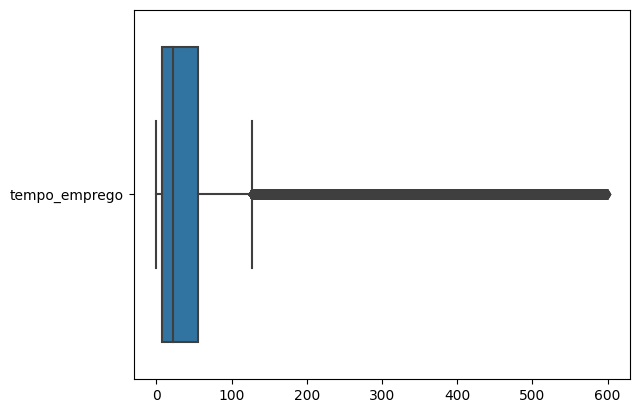

In [10]:
tempoempregousar = results.loc[results.ano >= 1994]
tempoempregousar_plotar = tempoempregousar.drop(columns=['idade', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'ano'])
sns.boxplot(data=tempoempregousar_plotar, orient='h', saturation=0.75, width=0.8)

#Remoção de Outliers

In [6]:
q25 = np.percentile(results.valor_remuneracao_media_sm, 25)
q75 = np.percentile(results.valor_remuneracao_media_sm, 75)
intr_qr = q75-q25
 
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
 
results.loc[results.valor_remuneracao_media_sm < min] = np.nan
results.loc[results.valor_remuneracao_media_sm > max] = np.nan

In [7]:
q25 = np.percentile(idadeusar.idade, 25)
q75 = np.percentile(idadeusar.idade, 75)
intr_qr = q75-q25
 
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
 
idadeusar.loc[idadeusar.idade < min] = np.nan
idadeusar.loc[idadeusar.idade > max] = np.nan

In [8]:
q25 = np.percentile(horasusar.quantidade_horas_contratadas, 25)
q75 = np.percentile(horasusar.quantidade_horas_contratadas, 75)
intr_qr = q75-q25
 
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
 
horasusar.loc[horasusar.quantidade_horas_contratadas < min] = np.nan
horasusar.loc[horasusar.quantidade_horas_contratadas > max] = np.nan

In [11]:
q25 = np.percentile(tempoempregousar.tempo_emprego, 25)
q75 = np.percentile(tempoempregousar.tempo_emprego, 75)
intr_qr = q75-q25
 
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

tempoempregousar.loc[tempoempregousar.tempo_emprego < min] = np.nan
tempoempregousar.loc[tempoempregousar.tempo_emprego > max] = np.nan

In [12]:
idadeusar = idadeusar.dropna()
remuneracao = results.dropna(subset=['valor_remuneracao_media_sm'])
horasusar = horasusar.dropna()
tempoempregousar = tempoempregousar.dropna()

In [26]:
idadeusar.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1069217.0,1.069217e+06,1069217.0,1.069217e+06,1069217.0
mean,2011.773846,5.046595e+01,37.537559,5.855971e+00,34.725859
std,5.758636,7.107578e+01,7.671888,7.663344e+00,10.306095
min,1994.0,0.000000e+00,0.0,0.000000e+00,11.0
25%,2008.0,8.200000e+00,30.0,1.800000e+00,27.0
50%,2012.0,2.290000e+01,40.0,3.550000e+00,33.0
75%,2016.0,5.990000e+01,44.0,6.860000e+00,41.0
max,2021.0,5.973000e+02,60.0,1.499700e+02,64.0


In [27]:
horasusar.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1074312.0,1.074312e+06,1074312.0,1.074312e+06,1074312.0
mean,2011.752622,5.208428e+01,37.817248,5.906158e+00,35.166147
std,5.759077,7.446393e+01,6.993059,7.740899e+00,11.019098
min,1994.0,0.000000e+00,9.0,0.000000e+00,0.0
25%,2008.0,8.400000e+00,30.0,1.810000e+00,27.0
50%,2012.0,2.330000e+01,40.0,3.570000e+00,33.0
75%,2016.0,6.180000e+01,44.0,6.900000e+00,42.0
max,2021.0,5.999000e+02,60.0,1.499700e+02,100.0


In [25]:
remuneracao.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,1035337.0,1.035337e+06,1003690.0,1.035337e+06,1003690.0
mean,2011.337732,4.574570e+01,37.622987,4.332435e+00,34.48738
std,6.795256,6.714814e+01,7.722095,3.315038e+00,10.766085
min,1985.0,0.000000e+00,0.0,0.000000e+00,0.0
25%,2008.0,7.200000e+00,30.0,1.730000e+00,26.0
50%,2012.0,2.090000e+01,40.0,3.300000e+00,32.0
75%,2016.0,5.360000e+01,44.0,6.020000e+00,41.0
max,2021.0,5.996000e+02,60.0,1.504000e+01,100.0


In [28]:
tempoempregousar.describe()

,ano,tempo_emprego,quantidade_horas_contratadas,valor_remuneracao_media_sm,idade
count,979200.0,979200.00000,979200.0,979200.000000,979200.0
mean,2011.792154,31.77359,37.782954,5.328297,33.687521
std,5.667596,32.79336,7.654293,7.102938,10.075953
min,1994.0,0.00000,0.0,0.000000,0.0
25%,2008.0,7.30000,30.0,1.720000,26.0
50%,2012.0,19.80000,40.0,3.270000,31.0
75%,2016.0,45.80000,44.0,6.220000,39.0
max,2021.0,142.10000,60.0,149.970000,100.0


#Plotagens e produção de medidas agregadas

In [13]:
#Para plotagem

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

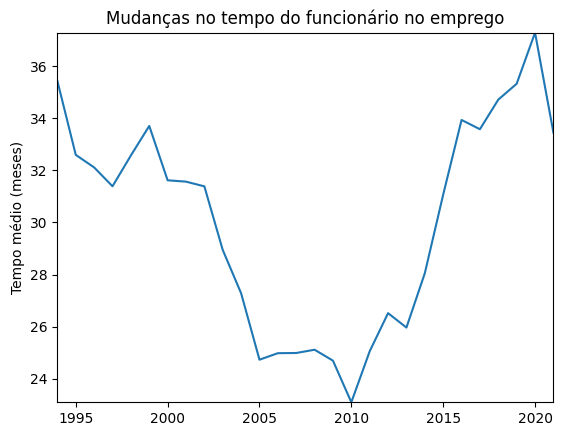

In [14]:
#Tempo médio do funcionário na empresa

fig, ax = plt.subplots()
groupbyyear = tempoempregousar.loc[:, ['ano', 'tempo_emprego']].groupby('ano')
avgs = groupbyyear.mean()
x = avgs.index
y = avgs.tempo_emprego
a = np.asarray(y)
plot(x, y, ax, 'Mudanças no tempo do funcionário no emprego', 'Tempo médio (meses)')
pd.DataFrame(a).to_csv('tempo.csv', sep = ';', header  = ['tempo_emprego'])

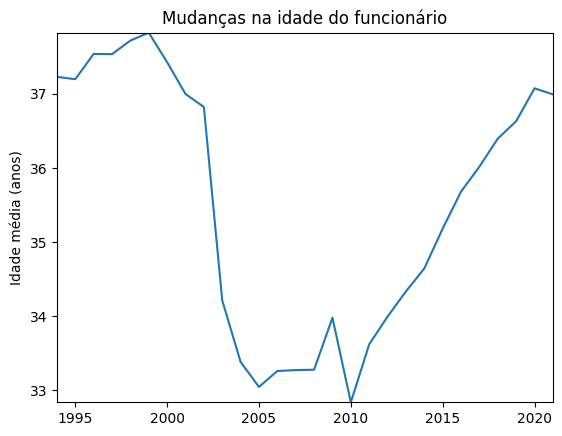

In [15]:
#Idade

fig, ax = plt.subplots()
groupbyyear = idadeusar.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x1 = avgs.index
y1 = avgs.idade
a1 = np.asarray(y1)
plot(x1, a1, ax, 'Mudanças na idade do funcionário', 'Idade média (anos)')
pd.DataFrame(a1).to_csv('idade.csv', sep = ';', header  = ['idade'])

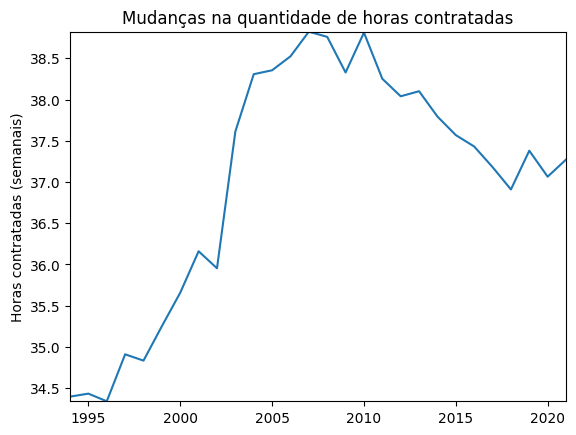

In [16]:
# Análise de horas contratadas

fig, ax = plt.subplots()
groupbyyear = horasusar.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x2 = avgs.index
y2 = avgs.quantidade_horas_contratadas
a2 = np.asarray(y2)
plot(x2, a2, ax, 'Mudanças na quantidade de horas contratadas', 'Horas contratadas (semanais)')
pd.DataFrame(a2).to_csv('horas.csv', sep = ';', header  = ['quantidade_horas_contratadas'])

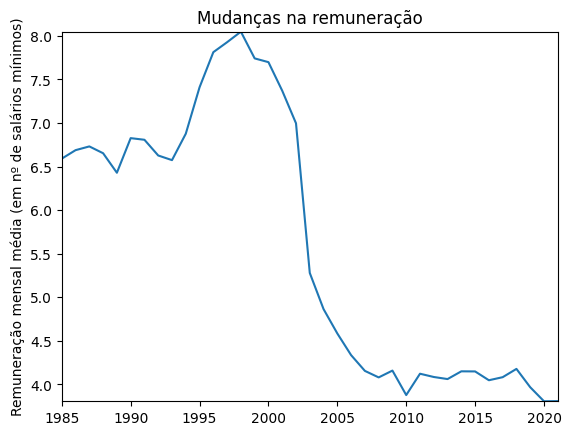

In [17]:
# Análise de remuneração

fig, ax = plt.subplots()
groupbyyear = remuneracao.loc[:, ['ano', 'tempo_emprego', 'quantidade_horas_contratadas', 'valor_remuneracao_media_sm', 'idade']].groupby('ano')
avgs = groupbyyear.mean()
x3 = avgs.index
y3 = avgs.valor_remuneracao_media_sm
a3 = np.asarray(y3)
plot(x3, a3, ax, 'Mudanças na remuneração', 'Remuneração mensal média (em nº de salários mínimos)')
pd.DataFrame(a3).to_csv('salário.csv', sep = ';', header  = ['remuneracao'])

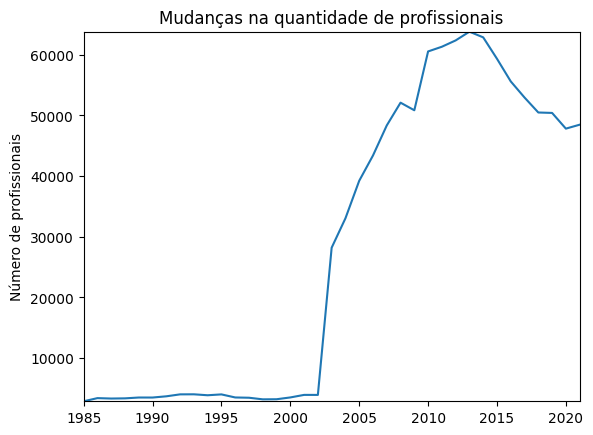

In [18]:
#Análise do número de profissionais

profissionais = results.dropna(subset=['ano'])
fig, ax = plt.subplots()
groupbyyear = profissionais.loc[:, ['ano']].groupby('ano')
counts1 = groupbyyear.ano.value_counts()
a4 = np.asarray(counts1)
plot(x3, a4, ax, 'Mudanças na quantidade de profissionais', 'Número de profissionais')
pd.DataFrame(a4).to_csv('profissionais.csv', sep = ';', header = ['total'])

In [66]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_41f403ca_1881c883d4a') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT ano, tipo_vinculo FROM `blotta._d731c8db3b43ddb417ba10d6e72a9c633c4d7cfd.anon1e1afa8315e387c866bdf11b81f37d15f75b584e998128324560b6f250cc1f29` WHERE tipo_vinculo='95' OR tipo_vinculo='90' OR tipo_vinculo='50' OR tipo_vinculo='40' OR tipo_vinculo='5' OR tipo_vinculo='4' OR tipo_vinculo='3'


In [67]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_41f403ca_1881c883d4a') # Job ID inserted based on the query results selected to explore
results1 = job.to_dataframe()
results1

,ano,tipo_vinculo
0,1993,5
1,1992,5
2,1993,5
3,1993,5
4,1993,5
...,...,...
40253,2018,50
40254,2018,50
40255,2018,50
40256,2018,50


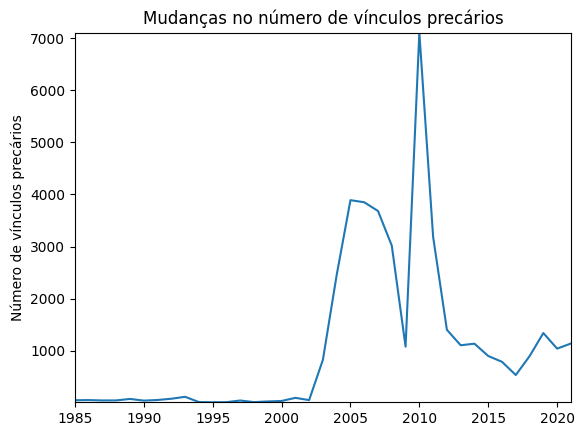

In [68]:
#Análise do número de vínculos precários

fig, ax = plt.subplots()
groupbyyear = results1.loc[:, ['ano', 'tipo_vinculo']].groupby('ano')
counts2 = groupbyyear.ano.value_counts()
a5 = np.asarray(counts2)
plot(x3, a5, ax, 'Mudanças no número de vínculos precários', 'Número de vínculos precários')
pd.DataFrame(a5).to_csv('precários.csv', sep = ';', header = ['total'])

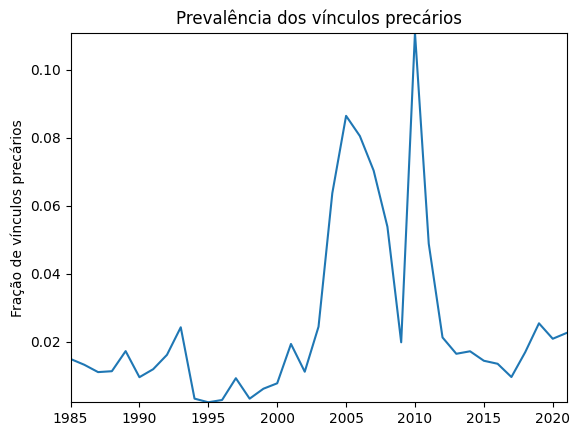

In [70]:
#Análise da prevalência de vínculos precários

fig, ax = plt.subplots()
a6 = a5/a4
plot(x3, a6, ax, 'Prevalência dos vínculos precários', 'Fração de vínculos precários')
pd.DataFrame(a6).to_csv('precários_prevalencia.csv', sep = ';', header = ['fracao'])

In [71]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_79039b92_1881c8e5dee') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT ano FROM `blotta._d731c8db3b43ddb417ba10d6e72a9c633c4d7cfd.anon1e1afa8315e387c866bdf11b81f37d15f75b584e998128324560b6f250cc1f29` WHERE cbo_2002='261110'


In [75]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_79039b92_1881c8e5dee') # Job ID inserted based on the query results selected to explore
results2 = job.to_dataframe()
results2

,ano
0,2003
1,2003
2,2003
3,2003
4,2003
...,...
213588,2018
213589,2018
213590,2018
213591,2018


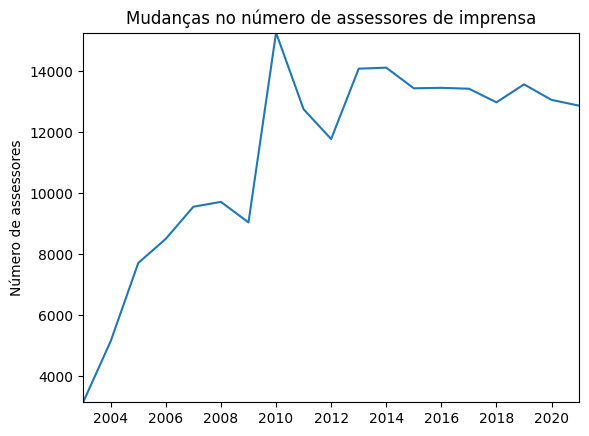

In [78]:
#Análise do número de assessores de imprensa

fig, ax = plt.subplots()
groupbyyear = results2.loc[:, ['ano']].groupby('ano')
avgs = groupbyyear.mean()
x_2 = avgs.index
counts3 = groupbyyear.ano.value_counts()
a7 = np.asarray(counts3)
plot(x_2, a7, ax, 'Mudanças no número de assessores de imprensa', 'Número de assessores')
pd.DataFrame(a7).to_csv('assessores.csv', sep = ';', header = ['total'])